In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage import exposure

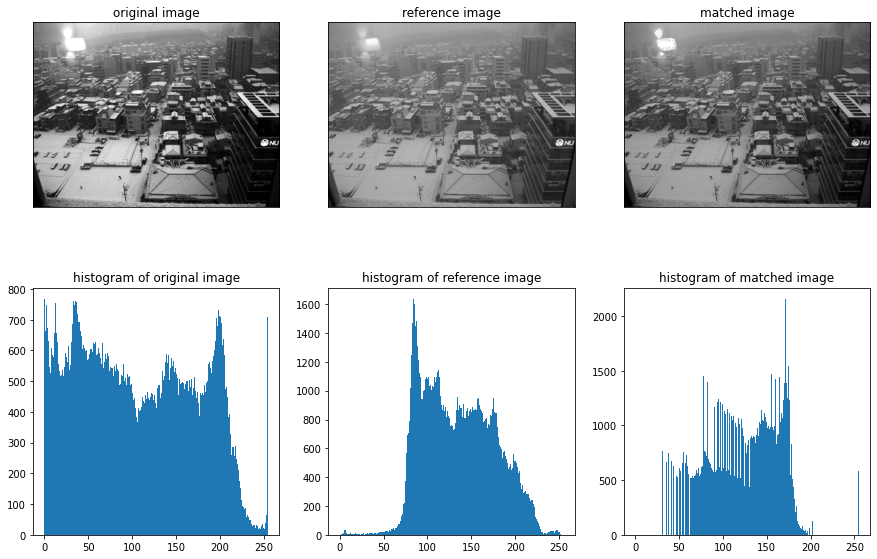

In [9]:
reference = np.array(cv2.imread("reference_img.jpg", cv2.IMREAD_GRAYSCALE))
image_tobe_adjusted = np.array(cv2.imread("image_tobe_adjusted.jpg", cv2.IMREAD_GRAYSCALE))

# Equalization function in skimage
# reference image to match histogram of. Must have the same number of channels as image.
img_matched = exposure.match_histograms(image_tobe_adjusted, reference)

fig, axes= plt.subplots(2, 3, figsize=(15, 10))
axes[0,0].imshow(image_tobe_adjusted, cmap='gray')
axes[0,0].set_title('original image')

axes[0,1].imshow(reference, cmap='gray')
axes[0,1].set_title('reference image')

axes[0,2].imshow(img_matched, cmap='gray')
axes[0,2].set_title('matched image')

axes[1,0].hist(image_tobe_adjusted.ravel(), bins = np.arange(0,256))
axes[1,0].set_title('histogram of original image')

axes[1,1].hist(reference.ravel()*255, bins = np.arange(0,256))
axes[1,1].set_title('histogram of reference image')

axes[1,2].hist(img_matched.ravel(), bins = np.arange(0,256))
axes[1,2].set_title('histogram of matched image')

# remove the x and y ticks
for ax in axes[0]:
    ax.set_xticks([])
    ax.set_yticks([])

cv2.waitKey(0)
cv2.destroyAllWindows()
